# Настройки

In [ ]:
!cd /content
!pip install torch torchvision matplotlib
!git clone https://github.com/MariaDys/multi12 сvrp1
!pip install -r /content/сvrp1/requirements.txt

fatal: destination path 'сvrp1' already exists and is not an empty directory.
  Using cached numpy-1.24.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.0 which is incompatible.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.30.0 which is incompatible.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.26.1 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 2.0.0 which is incompatibl

In [ ]:
!pip install numpy==1.24.4

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.0 which is incompatible.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.30.0 which is incompatible.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.26.1 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 2.0.0 which is incompatible.
cudf-cu12 25.2.1 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall timm
!pip install timm==0.6.13
import timm
model = timm.create_model('efficientnet_b0', pretrained=False)
print("timm работает корректно")

Found existing installation: timm 0.6.12
Uninstalling timm-0.6.12:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/timm-0.6.12.dist-info/*
    /usr/local/lib/python3.11/dist-packages/timm/*
Proceed (Y/n)? Y
  Successfully uninstalled timm-0.6.12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 14.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models-pytorch 0.3.2 requires timm==0.6.12, but you have timm 0.6.13 which is incompatible.
timm работает корректно


In [ ]:
!wget -O model_weights.pth https://0xdata-public.s3.amazonaws.com/beluga/wildfire/models/forest_ws2_60d_r8_all.pth

--2025-04-03 05:52:21--  https://0xdata-public.s3.amazonaws.com/beluga/wildfire/models/forest_ws2_60d_r8_all.pth
Resolving 0xdata-public.s3.amazonaws.com (0xdata-public.s3.amazonaws.com)... 3.5.29.232, 52.217.121.177, 3.5.28.168, ...
Connecting to 0xdata-public.s3.amazonaws.com (0xdata-public.s3.amazonaws.com)|3.5.29.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51110127 (49M) [binary/octet-stream]
Saving to: ‘model_weights.pth’

model_weights.pth   100%[===================>]  48.74M  43.9MB/s    in 1.1s    

2025-04-03 05:52:22 (43.9 MB/s) - ‘model_weights.pth’ saved [51110127/51110127]



In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 21.2 MB/s eta 0:00:00


# Проход по всем папкам на гугл диске

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score

In [ ]:
import os

def get_paths_for_coordinates(coord_str):
    """
    coord_str: строка с координатами, например '54.62_4.39'.
    Возвращает словарь с путями:
      - tiff_dir
      - output_dir
      - tiff_path (путь к файлу, начинающемуся на 'Deforestation')
    """
    base_path = "/content/drive/MyDrive/test_model_samples"
    tiff_dir = os.path.join(base_path, coord_str)
    output_dir = os.path.join(tiff_dir, "output_256x256")
    deforestation_files = [
        f for f in os.listdir(tiff_dir)
        if f.startswith("Deforestation") and f.endswith(".tiff")
    ]
    if not deforestation_files:
        raise FileNotFoundError(
            f"Не найден файл, начинающийся на 'Deforestation' в папке: {tiff_dir}"
        )

    deforestation_file = deforestation_files[0] # Считаем, что в папке одна маска Deforestation
    tiff_path = os.path.join(tiff_dir, deforestation_file)
    return {
        "tiff_dir": tiff_dir,
        "output_dir": output_dir,
        "tiff_path": tiff_path
    }


# #example of using
# coord_input = "54.92_4.39"
# paths = get_paths_for_coordinates(coord_input)
# print(paths["tiff_dir"])
# print(paths["output_dir"])
# print(paths["tiff_path"])


In [ ]:
def compute_metrics(gt, pred):
        """
        gt: ground-truth маска сегментации;
        pred: предсказанная маска сегментации;

        Вычисляет ряд дополнительных метрик для полученного предсказания модели.
        """

        gt_flat = gt.flatten()
        pred_flat = pred.flatten()
        tn, fp, fn, tp = confusion_matrix(gt_flat, pred_flat, labels=[0,1]).ravel()
        metrics = {
            "IoU": tp/(tp+fp+fn) if (tp+fp+fn)>0 else 0,
            "Precision": precision_score(gt_flat, pred_flat),
            "Recall": recall_score(gt_flat, pred_flat),
            "F1 (Dice)": f1_score(gt_flat, pred_flat),
            # "Accuracy": accuracy_score(gt_flat, pred_flat),
            # "Specificity": tn/(tn+fp) if (tn+fp)>0 else 0,
            # "Balanced Acc": (recall_score(gt_flat, pred_flat) + tn/(tn+fp))/2,
            # "MCC": matthews_corrcoef(gt_flat, pred_flat),
            # "Kappa": cohen_kappa_score(gt_flat, pred_flat)
        }
        return metrics

In [ ]:
def load_tiff(file_path):
  """
  Загрузка одного TIFF-файла
  """
  with rasterio.open(file_path) as src:
    return src.read(1)

In [ ]:
def process_folder(coord_input, model, device):
    """
    coord_input: строка с координатами, например '54.62_4.39';
    model: тестируемая модель;
    device: cuda or cpu.

    Применяет к папке с введенными координатами следующие действия:
      - по координатам получает путь (на гугл диске данные лежат в подпапке с именем coord_input
      - масштабирует все tiff-файлы (каналы) в подпапке до 256x256
      - объединяет каналы со спутников landsat8, sentinel1, sentinel2
      - нормализует каналы до диапазона значений [0,1] по min-max нормализации
      - прогоняет через модель, получает предсказание, сравнивает с ground-truth маской по IoU и еще некоторым метрикам
    """

    try:
        paths = get_paths_for_coordinates(coord_input)
    except Exception as e:
        print(f"[{coord_input}] ошибка получения пути: {e}")
        return None, None
    tiff_dir = paths["tiff_dir"] #подпапка с каналами
    output_dir = paths["output_dir"] #вложенная папка куда уйдут масштабированные до 256x256 каналы
    tiff_path = paths["tiff_path"] #путь к ground-truth
    os.makedirs(output_dir, exist_ok=True)



    tiff_files = glob(os.path.join(tiff_dir, "*.tiff")) # масштабирование tiff-файлов до 256x256
    for file_path in tiff_files:
        file_name = os.path.basename(file_path)
        out_path = os.path.join(output_dir, file_name)
        if os.path.exists(out_path): # если уже существует масштабированное изображение – пропускаем
            continue
        with rasterio.open(file_path) as src:
            data = src.read(1)
            data_resized = cv2.resize(data, (256, 256), interpolation=cv2.INTER_CUBIC)
            with rasterio.open(
                out_path,
                "w",
                driver="GTiff",
                height=data_resized.shape[0],
                width=data_resized.shape[1],
                count=1,
                dtype=data_resized.dtype,
                crs=src.crs,
                transform=src.transform,
            ) as dst:
                dst.write(data_resized, 1)
    print(f"[{coord_input}] файлы масштабированы до 256x256")



    satellite_data = {"landsat8": [], "sentinel1": [], "sentinel2": []}
    for file in sorted(os.listdir(output_dir)):
        if not file.endswith('.tiff') or file.startswith("Deforestation"):
            continue
        file_path = os.path.join(output_dir, file)

        if "Landsat8" in file:
            satellite_data["landsat8"].append(load_tiff(file_path))
        elif "Sentinel1" in file:
            satellite_data["sentinel1"].append(load_tiff(file_path))
        elif "Sentinel2" in file:
            satellite_data["sentinel2"].append(load_tiff(file_path))

    all_data = satellite_data["landsat8"] + satellite_data["sentinel1"] + satellite_data["sentinel2"]
    all_data_array = np.stack(all_data, axis=0) # numpy массив (C, H, W)
    print("Форма исходного массива:", all_data_array.shape)


    # min-max нормализация
    normalized_data_array = []
    for c in range(all_data_array.shape[0]):
        band = all_data_array[c]
        min_val, max_val = band.min(), band.max()
        if min_val == max_val:
            band_norm = np.zeros_like(band)
        else:
            band_norm = (band - min_val) / (max_val - min_val)
        band_norm = np.clip(band_norm, 0, 1)
        normalized_data_array.append(band_norm)
    normalized_array = np.stack(normalized_data_array, axis=0)
    # print(f"[{coord_input}] Форма после нормализации: {normalized_array.shape}")

    input_tensor = torch.tensor(normalized_array, dtype=torch.float32).unsqueeze(0)  # (1, C, 256, 256)
    expanded_tensor = input_tensor.repeat(1, 8, 1, 1).to(device)
    # print(f"[{coord_input}] Форма тензора после повторения каналов: {expanded_tensor.shape}")


    # предсказание модели model_weights.pth
    dummy_mask = torch.zeros_like(expanded_tensor[:, :1, :, :])
    batch = {"input": expanded_tensor, "mask": dummy_mask}
    with torch.no_grad():
        output = model(batch)
        predicted_mask = torch.sigmoid(output["logits"]).squeeze(0).cpu().numpy()


    # ground truth маска
    with rasterio.open(tiff_path) as src:
        gt_mask = src.read(1)
        gt_mask = (gt_mask > 0).astype(np.uint8)
    gt_mask = gt_mask[:256, :256]
    if gt_mask.ndim == 2:
      gt_mask = np.expand_dims(gt_mask, axis=0)


    thresholds = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #перебор пороговых значений и вычисление IoU для каждого
    iou_values = {}
    for val_tres in thresholds:
        binary_mask = (predicted_mask > val_tres).astype(float)
        intersection = np.logical_and(gt_mask, binary_mask).sum()
        union = np.logical_or(gt_mask, binary_mask).sum()
        iou_val = intersection / union if union > 0 else 0
        iou_values[val_tres] = iou_val
    print(f"[{coord_input}] Threshold:IoU", " | ".join(f"{thr}:{iou_values[thr]:.4f}" for thr in thresholds))
    best_threshold = max(iou_values, key=iou_values.get) #max IoU
    best_iou = iou_values[best_threshold]
    print(f"[{coord_input}] Лучший порог: {best_threshold} с IoU: {best_iou:.4f}")
    binary_mask_best = (predicted_mask > best_threshold).astype(float)

    # визуализация бинарной маски для лучшего порога
    # plt.figure(figsize=(8, 8))
    # plt.imshow(binary_mask_best.squeeze(), cmap="gray")
    # plt.title(f"[{coord_input}] Бинарная маска (порог {best_threshold})")
    # plt.show()

    #другие метрики
    metrics = compute_metrics(gt_mask, binary_mask_best)
    # print(metrics)


    return best_threshold, best_iou, metrics

In [ ]:
#обработка около 2 минут
from сvrp1.src.configs.forest_ws2_60d_r8_all import cfg
from сvrp1.src.models.forest_model import Net
import torch
import matplotlib.pyplot as plt
from collections import OrderedDict
import rasterio
import numpy as np
import cv2
import os
from glob import glob
from math import ceil

base_dir = "/content/drive/MyDrive/test_model_samples"
all_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
results = {}

# Подготовка модели
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net(cfg).to(device)

checkpoint = torch.load("/content/model_weights.pth", map_location=device)
new_state_dict = OrderedDict((k[7:], v) if k.startswith("module.") else (k, v) for k, v in checkpoint["model"].items())
model.load_state_dict(new_state_dict)
model.eval()

# Перебор подпапок (предполагается, что имена подпапок — это строки с координатами)
for coord_input in sorted(all_folders):
    print(f"\n=== Обработка папки: {coord_input} ===")
    best_thr, best_iou, metrics = process_folder(coord_input, model, device)
    results[coord_input] = {"iou": best_iou, "other": metrics}

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b3_ns-9d44bf68.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b3_ns-9d44bf68.pth



=== Обработка папки: 54.92_4.39 ===
[54.92_4.39] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[54.92_4.39] Threshold:IoU 0.01:0.4191 | 0.1:0.7422 | 0.2:0.7605 | 0.3:0.6948 | 0.4:0.6115 | 0.5:0.5091 | 0.6:0.3977 | 0.7:0.2860 | 0.8:0.1799 | 0.9:0.0287
[54.92_4.39] Лучший порог: 0.2 с IoU: 0.7605

=== Обработка папки: 54.94_4.37 ===
[54.94_4.37] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[54.94_4.37] Threshold:IoU 0.01:0.6698 | 0.1:0.7397 | 0.2:0.7357 | 0.3:0.7289 | 0.4:0.7145 | 0.5:0.6785 | 0.6:0.6411 | 0.7:0.5557 | 0.8:0.3775 | 0.9:0.1360
[54.94_4.37] Лучший порог: 0.1 с IoU: 0.7397

=== Обработка папки: 54.94_4.39 ===
[54.94_4.39] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[54.94_4.39] Threshold:IoU 0.01:0.7043 | 0.1:0.7075 | 0.2:0.7116 | 0.3:0.7223 | 0.4:0.7377 | 0.5:0.7585 | 0.6:0.7705 | 0.7:0.7538 | 0.8:0.6789 | 0.9:0.4694
[54.94_4.39] Лучший порог: 0.6 с IoU: 0.7705

=== Обработка папки: 54.96_4.37 ===
[54.96_4.37] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[54.96_4.37] Threshold:IoU 0.01:0.6625 | 0.1:0.7740 | 0.2:0.7906 | 0.3:0.7940 | 0.4:0.7594 | 0.5:0.6634 | 0.6:0.5358 | 0.7:0.3945 | 0.8:0.2460 | 0.9:0.0711
[54.96_4.37] Лучший порог: 0.3 с IoU: 0.7940

=== Обработка папки: 54.96_4.39 ===
[54.96_4.39] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[54.96_4.39] Threshold:IoU 0.01:0.6119 | 0.1:0.6371 | 0.2:0.5631 | 0.3:0.5058 | 0.4:0.4272 | 0.5:0.3091 | 0.6:0.1520 | 0.7:0.0521 | 0.8:0.0106 | 0.9:0.0011
[54.96_4.39] Лучший порог: 0.1 с IoU: 0.6371

=== Обработка папки: 54.98_4.37 ===
[54.98_4.37] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[54.98_4.37] Threshold:IoU 0.01:0.3623 | 0.1:0.5917 | 0.2:0.6039 | 0.3:0.5176 | 0.4:0.3809 | 0.5:0.2628 | 0.6:0.1550 | 0.7:0.0515 | 0.8:0.0049 | 0.9:0.0000
[54.98_4.37] Лучший порог: 0.2 с IoU: 0.6039

=== Обработка папки: 55.02_4.35 ===
[55.02_4.35] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[55.02_4.35] Threshold:IoU 0.01:0.4371 | 0.1:0.6182 | 0.2:0.3330 | 0.3:0.1687 | 0.4:0.0734 | 0.5:0.0118 | 0.6:0.0007 | 0.7:0.0000 | 0.8:0.0000 | 0.9:0.0000
[55.02_4.35] Лучший порог: 0.1 с IoU: 0.6182

=== Обработка папки: 55.02_4.39 ===
[55.02_4.39] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[55.02_4.39] Threshold:IoU 0.01:0.5591 | 0.1:0.6182 | 0.2:0.5295 | 0.3:0.4383 | 0.4:0.3820 | 0.5:0.3105 | 0.6:0.2439 | 0.7:0.1475 | 0.8:0.0496 | 0.9:0.0019
[55.02_4.39] Лучший порог: 0.1 с IoU: 0.6182

=== Обработка папки: 55.04_4.37 ===
[55.04_4.37] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[55.04_4.37] Threshold:IoU 0.01:0.6776 | 0.1:0.7307 | 0.2:0.8012 | 0.3:0.8332 | 0.4:0.8117 | 0.5:0.6974 | 0.6:0.5507 | 0.7:0.4206 | 0.8:0.2590 | 0.9:0.1515
[55.04_4.37] Лучший порог: 0.3 с IoU: 0.8332

=== Обработка папки: 55.06_4.37 ===
[55.06_4.37] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[55.06_4.37] Threshold:IoU 0.01:0.2902 | 0.1:0.5930 | 0.2:0.5087 | 0.3:0.3840 | 0.4:0.2830 | 0.5:0.1996 | 0.6:0.1336 | 0.7:0.0835 | 0.8:0.0218 | 0.9:0.0000
[55.06_4.37] Лучший порог: 0.1 с IoU: 0.5930

=== Обработка папки: 55.08_4.37 ===
[55.08_4.37] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[55.08_4.37] Threshold:IoU 0.01:0.7152 | 0.1:0.8183 | 0.2:0.8579 | 0.3:0.8882 | 0.4:0.8986 | 0.5:0.8972 | 0.6:0.8844 | 0.7:0.8518 | 0.8:0.7625 | 0.9:0.4856
[55.08_4.37] Лучший порог: 0.4 с IoU: 0.8986

=== Обработка папки: 55.08_4.39 ===
[55.08_4.39] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[55.08_4.39] Threshold:IoU 0.01:0.4161 | 0.1:0.5819 | 0.2:0.6354 | 0.3:0.6799 | 0.4:0.6918 | 0.5:0.6589 | 0.6:0.5799 | 0.7:0.4323 | 0.8:0.2215 | 0.9:0.0369
[55.08_4.39] Лучший порог: 0.4 с IoU: 0.6918

=== Обработка папки: 55.10_4.37 ===
[55.10_4.37] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[55.10_4.37] Threshold:IoU 0.01:0.4260 | 0.1:0.6513 | 0.2:0.6761 | 0.3:0.6909 | 0.4:0.6952 | 0.5:0.6959 | 0.6:0.6542 | 0.7:0.5629 | 0.8:0.3712 | 0.9:0.1661
[55.10_4.37] Лучший порог: 0.5 с IoU: 0.6959

=== Обработка папки: 55.16_4.37 ===
[55.16_4.37] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[55.16_4.37] Threshold:IoU 0.01:0.4638 | 0.1:0.6160 | 0.2:0.4728 | 0.3:0.3182 | 0.4:0.1780 | 0.5:0.0740 | 0.6:0.0211 | 0.7:0.0053 | 0.8:0.0004 | 0.9:0.0000
[55.16_4.37] Лучший порог: 0.1 с IoU: 0.6160

=== Обработка папки: 55_4.39 ===
[55_4.39] файлы масштабированы до 256x256
Форма исходного массива: (24, 256, 256)


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[55_4.39] Threshold:IoU 0.01:0.6802 | 0.1:0.8113 | 0.2:0.7932 | 0.3:0.7271 | 0.4:0.6294 | 0.5:0.5090 | 0.6:0.3679 | 0.7:0.2225 | 0.8:0.0910 | 0.9:0.0132
[55_4.39] Лучший порог: 0.1 с IoU: 0.8113


In [ ]:
# Указываем имя выходного файла
output_file = "results_summary.txt"

with open(output_file, "w") as f:
    for folder, res in results.items():
        print(f"{folder}: {res}")
        f.write(f"{folder}: {res}\n")

print(f"\nРезультаты сохранены в файл: {output_file}")


54.92_4.39: {'iou': 0.7605291999373728, 'other': {'IoU': 0.7605291999373728, 'Precision': 0.8786289228543005, 'Recall': 0.8498075577326802, 'F1 (Dice)': 0.8639779447730002}}
54.94_4.37: {'iou': 0.7397014684849827, 'other': {'IoU': 0.7397014684849827, 'Precision': 0.766938178780284, 'Recall': 0.9541887537677997, 'F1 (Dice)': 0.8503774720948544}}
54.94_4.39: {'iou': 0.7705161126984701, 'other': {'IoU': 0.7705161126984701, 'Precision': 0.8233748164180258, 'Recall': 0.9230902552103644, 'F1 (Dice)': 0.8703858803341981}}
54.96_4.37: {'iou': 0.7940094137783483, 'other': {'IoU': 0.7940094137783483, 'Precision': 0.8889101796407186, 'Recall': 0.8814783145693791, 'F1 (Dice)': 0.8851786480942613}}
54.96_4.39: {'iou': 0.6370992135511192, 'other': {'IoU': 0.6370992135511192, 'Precision': 0.766978212053165, 'Recall': 0.7900165661238396, 'F1 (Dice)': 0.7783269435077832}}
54.98_4.37: {'iou': 0.6038981208262153, 'other': {'IoU': 0.6038981208262153, 'Precision': 0.7459952038369304, 'Recall': 0.7602150537

In [ ]:
# output_file = "results_clean.txt"

# print("\n=== Итоговые результаты ===")
# for folder, res in results.items():
#     print(f"{folder}: {res}")


=== Итоговые результаты ===
54.92_4.39: {'iou': 0.7605291999373728, 'other': {'IoU': 0.7605291999373728, 'Precision': 0.8786289228543005, 'Recall': 0.8498075577326802, 'F1 (Dice)': 0.8639779447730002}}
54.94_4.37: {'iou': 0.7397014684849827, 'other': {'IoU': 0.7397014684849827, 'Precision': 0.766938178780284, 'Recall': 0.9541887537677997, 'F1 (Dice)': 0.8503774720948544}}
54.94_4.39: {'iou': 0.7705161126984701, 'other': {'IoU': 0.7705161126984701, 'Precision': 0.8233748164180258, 'Recall': 0.9230902552103644, 'F1 (Dice)': 0.8703858803341981}}
54.96_4.37: {'iou': 0.7940094137783483, 'other': {'IoU': 0.7940094137783483, 'Precision': 0.8889101796407186, 'Recall': 0.8814783145693791, 'F1 (Dice)': 0.8851786480942613}}
54.96_4.39: {'iou': 0.6370992135511192, 'other': {'IoU': 0.6370992135511192, 'Precision': 0.766978212053165, 'Recall': 0.7900165661238396, 'F1 (Dice)': 0.7783269435077832}}
54.98_4.37: {'iou': 0.6038981208262153, 'other': {'IoU': 0.6038981208262153, 'Precision': 0.74599520383

In [ ]:
# Определяем количество каналов каждого спутника по префиксам файлов
sample_coord = sorted(results.keys())[0]  # берем первый патч из набора
paths = get_paths_for_coordinates(sample_coord)
output_dir = paths["output_dir"]
file_list = sorted(f for f in os.listdir(output_dir)
                   if f.endswith(".tiff") and not f.startswith("Deforestation"))
n_landsat8 = sum(1 for f in file_list if f.startswith("Landsat8_"))
n_sentinel1 = sum(1 for f in file_list if f.startswith("Sentinel1_"))
n_sentinel2 = sum(1 for f in file_list if f.startswith("Sentinel2_"))
total_bands = n_landsat8 + n_sentinel1 + n_sentinel2
base_channels = min(total_bands, 24)  # базовое число каналов (24, если лишние отброшены)
# Если есть лишние каналы (total_bands > 24), предположим, что они относятся к Sentinel-2 и отбрасываются:
if total_bands > base_channels:
    extra = total_bands - base_channels
    n_sentinel2 = max(0, n_sentinel2 - extra)
print(f"Каналы: Landsat-8 = {n_landsat8}, Sentinel-1 = {n_sentinel1}, Sentinel-2 = {n_sentinel2}")


Каналы: Landsat-8 = 9, Sentinel-1 = 2, Sentinel-2 = 13


# Визаулизация результатов (чистые данные)

In [ ]:
import pandas as pd

# DataFrame из словаря c результатами метрик
df = pd.DataFrame([
    {
        'Patch': patch,
        'IoU': res['iou'],
        'Precision': res['other']['Precision'],
        'Recall': res['other']['Recall'],
        'F1': res['other']['F1 (Dice)']
    }
    for patch, res in results.items()
])
df_sorted = df.sort_values(by='IoU', ascending=False).reset_index(drop=True)

#example
print(df_sorted.head())

        Patch       IoU  Precision    Recall        F1
0  55.08_4.37  0.898645   0.916909  0.978314  0.946617
1  55.04_4.37  0.833176   0.867272  0.954941  0.908997
2     55_4.39  0.811274   0.839249  0.960534  0.895805
3  54.96_4.37  0.794009   0.888910  0.881478  0.885179
4  54.94_4.39  0.770516   0.823375  0.923090  0.870386


                 IoU  Precision    Recall  F1 (Dice)
Patch                                               
54.92_4.39  0.760529   0.878629  0.849808   0.863978
54.94_4.37  0.739701   0.766938  0.954189   0.850377
54.94_4.39  0.770516   0.823375  0.923090   0.870386
54.96_4.37  0.794009   0.888910  0.881478   0.885179
54.96_4.39  0.637099   0.766978  0.790017   0.778327
54.98_4.37  0.603898   0.745995  0.760215   0.753038
55.02_4.35  0.618223   0.971112  0.629805   0.764076
55.02_4.39  0.618191   0.780272  0.748492   0.764052
55.04_4.37  0.833176   0.867272  0.954941   0.908997
55.06_4.37  0.593037   0.780814  0.711480   0.744536
55.08_4.37  0.898645   0.916909  0.978314   0.946617
55.08_4.39  0.691838   0.759632  0.885740   0.817854
55.10_4.37  0.695861   0.868033  0.778187   0.820658
55.16_4.37  0.615971   0.801542  0.726820   0.762354
55_4.39     0.811274   0.839249  0.960534   0.895805

Средние значения метрик:
IoU          0.712131
Precision    0.830377
Recall       0.835541
F1 (Dic

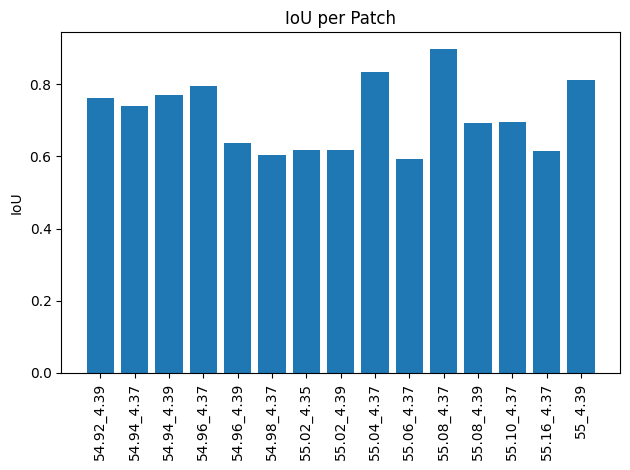

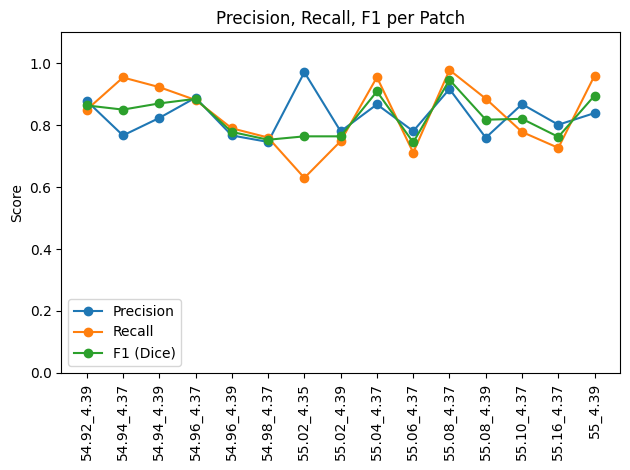

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Собираем DataFrame из словаря results (без сортировки)
rows = []
for patch, res in results.items():
    rows.append({
        'Patch': patch,
        'IoU': res['iou'],
        'Precision': res['other']['Precision'],
        'Recall': res['other']['Recall'],
        'F1 (Dice)': res['other']['F1 (Dice)']
    })

df = pd.DataFrame(rows).set_index('Patch')

# Выводим таблицу в консоль
print(df)

# Вычисляем и печатаем средние значения метрик
print("\nСредние значения метрик:")
print(df.mean())

# Бар‑чарт: IoU per patch
plt.figure()
plt.bar(df.index, df['IoU'])
plt.xticks(rotation=90)
plt.title('IoU per Patch')
plt.ylabel('IoU')
plt.tight_layout()
plt.show()

# Линейный график: Precision, Recall, F1 per patch
plt.figure()
plt.plot(df.index, df['Precision'], marker='o', label='Precision')
plt.plot(df.index, df['Recall'],    marker='o', label='Recall')
plt.plot(df.index, df['F1 (Dice)'], marker='o', label='F1 (Dice)')
plt.xticks(rotation=90)
plt.title('Precision, Recall, F1 per Patch')
plt.ylabel('Score')
plt.legend()
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


# Добавление шума

### Gaussian Noise

In [ ]:
# def add_gaussian_noise(x: torch.Tensor, sigma: float) -> torch.Tensor:
#     noise = torch.randn_like(x) * sigma
#     return torch.clamp(x + noise, 0.0, 1.0)

In [ ]:
# def add_gaussian_noise(x: torch.Tensor, sigma: float,
#                        sentinel1=True, sentinel2=True, landsat8=True) -> torch.Tensor:
#     """Добавляет Gaussian шум с стандартным отклонением sigma
#        только на выбранные группы каналов."""
#     noise = torch.randn_like(x) * sigma
#     # Определяем размерности
#     C = x.shape[1]
#     base_C = C // 8 if C % 8 == 0 else C  # число каналов до дублирования (обычно 24)
#     # Формируем булеву маску каналов (1 - шум применяется, 0 - нет)
#     channel_mask = torch.zeros((1, C, 1, 1), dtype=torch.float32, device=x.device)
#     # Индексы каналов каждой группы в пределах одного набора base_C
#     idx_land = range(0, min(n_landsat8, base_C))
#     idx_s1   = range(len(idx_land), len(idx_land) + min(n_sentinel1, base_C - len(idx_land)))
#     idx_s2   = range(idx_s1.stop, idx_s1.stop + min(n_sentinel2, base_C - idx_s1.stop))
#     # Помечаем в маске соответствующие каналы (с учетом повторения групп)
#     # Landsat-8
#     if landsat8:
#         for i in idx_land:
#             for k in range(C // base_C):
#                 channel_mask[:, i + k*base_C, :, :] = 1.0
#     # Sentinel-1
#     if sentinel1:
#         for i in idx_s1:
#             for k in range(C // base_C):
#                 channel_mask[:, i + k*base_C, :, :] = 1.0
#     # Sentinel-2
#     if sentinel2:
#         for i in idx_s2:
#             for k in range(C // base_C):
#                 channel_mask[:, i + k*base_C, :, :] = 1.0
#     # Накладываем шум только на отмеченные каналы
#     x_noisy = x + noise * channel_mask
#     return torch.clamp(x_noisy, 0.0, 1.0)


In [ ]:
def add_gaussian_noise(x: torch.Tensor, sigma: float, channels: list[int]) -> torch.Tensor:
    noise = torch.randn_like(x) * sigma
    mask = torch.zeros_like(x)
    mask[:, channels, :, :] = 1.0
    return torch.clamp(x + noise * mask, 0.0, 1.0)

### Salt‑and‑Pepper Noise

In [ ]:
# def add_sp_noise(x: torch.Tensor, prob: float) -> torch.Tensor:
#     mask = torch.rand_like(x)
#     x_noisy = x.clone()
#     x_noisy[mask < prob/2] = 0.0
#     x_noisy[mask > 1 - prob/2] = 1.0
#     return x_noisy

In [ ]:
# def add_sp_noise(x: torch.Tensor, prob: float,
#                  sentinel1=True, sentinel2=True, landsat8=True) -> torch.Tensor:
#     """Добавляет salt-and-pepper шум с вероятностью prob
#        только на выбранные группы каналов."""
#     rand_vals = torch.rand_like(x)
#     # Формируем маску каналов аналогично Gaussian
#     C = x.shape[1]
#     base_C = C // 8 if C % 8 == 0 else C
#     channel_mask = torch.zeros((1, C, 1, 1), dtype=torch.float32, device=x.device)
#     idx_land = range(0, min(n_landsat8, base_C))
#     idx_s1   = range(len(idx_land), len(idx_land) + min(n_sentinel1, base_C - len(idx_land)))
#     idx_s2   = range(idx_s1.stop, idx_s1.stop + min(n_sentinel2, base_C - idx_s1.stop))
#     if landsat8:
#         for i in idx_land:
#             for k in range(C // base_C):
#                 channel_mask[:, i + k*base_C, :, :] = 1.0
#     if sentinel1:
#         for i in idx_s1:
#             for k in range(C // base_C):
#                 channel_mask[:, i + k*base_C, :, :] = 1.0
#     if sentinel2:
#         for i in idx_s2:
#             for k in range(C // base_C):
#                 channel_mask[:, i + k*base_C, :, :] = 1.0
#     # Создаем копию входа и заменяем значения только на выбранных каналах
#     x_noisy = x.clone()
#     # "Pepper"_noise: значения 0
#     mask_pepper = (rand_vals < prob/2) & (channel_mask == 1)
#     # "Salt" noise: значения 1
#     mask_salt   = (rand_vals > 1 - prob/2) & (channel_mask == 1)
#     x_noisy[mask_pepper] = 0.0
#     x_noisy[mask_salt]   = 1.0
#     return x_noisy


In [ ]:
def add_sp_noise(x: torch.Tensor, prob: float, channels: list[int]) -> torch.Tensor:
    rand_vals = torch.rand_like(x)
    x_noisy = x.clone()
    mask_pepper = (rand_vals < prob / 2)
    mask_salt = (rand_vals > 1 - prob / 2)
    for c in channels:
        x_noisy[:, c][mask_pepper[:, c]] = 0.0
        x_noisy[:, c][mask_salt[:, c]] = 1.0
    return x_noisy

# Poison-шум

In [ ]:
def add_poisson_noise(x: torch.Tensor, dummy_level: float, channels: list[int]) -> torch.Tensor:
    """
    Добавляет Пуассоновский шум только на заданные каналы.
    dummy_level — игнорируется, нужен для совместимости с интерфейсом noise_funcs.
    """
    x_noisy = x.clone()
    for c in channels:
        vals = x[:, c, :, :] * 255  # масштабируем к uint8
        vals = torch.poisson(vals) / 255.0  # обратно в [0,1]
        x_noisy[:, c, :, :] = torch.clamp(vals, 0.0, 1.0)
    return x_noisy

# Применение шумов

In [ ]:
#обработка 4 минуты
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

# Thresholds for search (exactly как в process_folder)
thresholds = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# def load_patch_tensor(coord, device):
#     paths = get_paths_for_coordinates(coord)
#     out_dir = paths["output_dir"]
#     os.makedirs(out_dir, exist_ok=True)
#     # Resize code omitted (assume already done by process_folder run)
#     bands = [
#         load_tiff(os.path.join(out_dir,f))
#         for f in sorted(os.listdir(out_dir))
#         if f.endswith(".tiff") and not f.startswith("Deforestation")
#     ]
#     arr = np.stack(bands,0)[:24]                 # KEEP EXACTLY 24 bands
#     # Min‑max normalize
#     arr = np.stack([(b - b.min())/(b.max()-b.min()) if b.max()>b.min() else np.zeros_like(b) for b in arr],0)
#     inp = torch.tensor(arr, dtype=torch.float32).unsqueeze(0).to(device)
#     expanded = inp.repeat(1,8,1,1)
#     with rasterio.open(paths["tiff_path"]) as src:
#         gt = (src.read(1)>0).astype(np.uint8)[:256,:256]
#     return expanded, np.expand_dims(gt,0)

# Фиксированный порядок: сначала landsat8, затем sentinel1, затем sentinel2
n_landsat8 = 9  # количество каналов Landsat-8 (проверь для себя)
n_sentinel1 = 2
n_sentinel2 = 13

def load_patch_tensor(coord, device):
    paths = get_paths_for_coordinates(coord)
    out_dir = paths["output_dir"]
    os.makedirs(out_dir, exist_ok=True)

    # Список всех .tiff файлов, кроме маски
    files = sorted([
        f for f in os.listdir(out_dir)
        if f.endswith(".tiff") and not f.startswith("Deforestation")
    ])

    # Группировка по спутникам
    landsat8_files = sorted([f for f in files if f.startswith("Landsat8_")])
    sentinel1_files = sorted([f for f in files if f.startswith("Sentinel1_")])
    sentinel2_files = sorted([f for f in files if f.startswith("Sentinel2_")])

    # Объединяем в фиксированном порядке
    selected_files = landsat8_files + sentinel1_files + sentinel2_files
    selected_files = selected_files[:24]  # обрезаем до 24 каналов

    # Загружаем и нормализуем
    bands = [load_tiff(os.path.join(out_dir, f)) for f in selected_files]
    arr = np.stack(bands, 0)
    arr = np.stack([
        (b - b.min()) / (b.max() - b.min()) if b.max() > b.min() else np.zeros_like(b)
        for b in arr
    ], 0)

    # Преобразование в тензор
    inp = torch.tensor(arr, dtype=torch.float32).unsqueeze(0).to(device)
    expanded = inp.repeat(1, 8, 1, 1)

    # Загружаем маску
    with rasterio.open(paths["tiff_path"]) as src:
        gt = (src.read(1) > 0).astype(np.uint8)[:256, :256]

    return expanded, np.expand_dims(gt, 0)


def evaluate_best(inp, gt):
    batch = {"input": inp, "mask": torch.zeros_like(inp[:, :1])}
    with torch.no_grad():
        pred = torch.sigmoid(model(batch)["logits"])[0].cpu().numpy()
    best_thr, best_iou, best_metrics = 0, -1, None
    for thr in thresholds:
        bin_mask = (pred > thr).astype(float)
        metrics = compute_metrics(gt, bin_mask)
        if metrics["IoU"] > best_iou:
            best_iou, best_metrics, best_thr = metrics["IoU"], metrics, thr
    return best_thr, best_metrics

def get_channel_indices(sentinel1=True, sentinel2=True, landsat8=True):
    """Возвращает список индексов каналов для зашумления"""
    idx = []
    base_c = n_landsat8 + n_sentinel1 + n_sentinel2
    for rep in range(8):  # повторено 8 раз
        offset = rep * base_c
        if landsat8:
            idx += list(range(offset, offset + n_landsat8))
        if sentinel1:
            idx += list(range(offset + n_landsat8, offset + n_landsat8 + n_sentinel1))
        if sentinel2:
            idx += list(range(offset + n_landsat8 + n_sentinel1, offset + base_c))
    return idx

# Noise levels
gauss_levels = [0.01,0.03,0.05,0.1]
sp_levels    = [0.01,0.03,0.05,0.1]
poisson_levels = [0]

noise_funcs = [
    ("gauss", add_gaussian_noise, gauss_levels),
    ("sp", add_sp_noise, sp_levels),
    ("poisson", add_poisson_noise, poisson_levels)
]

# rows=[]
# for patch in sorted(results):
#     inp, gt = load_patch_tensor(patch, device)
#     base_thr, base_metrics = evaluate_best(inp, gt)
#     for name, fn, levels in noise_funcs:
#         for lvl in levels:
#             noisy_inp = fn(inp.clone(), lvl)
#             _, noisy_metrics = evaluate_best(noisy_inp, gt)
#             delta = {f"Δ_{k}": noisy_metrics[k] - base_metrics[k] for k in base_metrics}
#             rows.append({"Patch":patch,"Noise":name,"Level":lvl,**noisy_metrics,**delta})

rows = []

# Сценарии: имя и флаги для каналов
scenarios = [
    ("All", True, True, True),
    # ("Sentinel1", True, False, False),
    # ("Sentinel2", False, True, False)
    # ("Landsat8", False, False, True)
]

for patch in sorted(results):
    inp, gt = load_patch_tensor(patch, device)
    base_thr, base_metrics = evaluate_best(inp, gt)

    for scenario_name, s1_flag, s2_flag, l8_flag in scenarios:
        channels = get_channel_indices(sentinel1=s1_flag, sentinel2=s2_flag, landsat8=l8_flag)

        for name, fn, levels in noise_funcs:
            for lvl in levels:
                noisy_inp = fn(inp.clone(), lvl, channels=channels)
                _, noisy_metrics = evaluate_best(noisy_inp, gt)
                delta = {f"Δ_{k}": noisy_metrics[k] - base_metrics[k] for k in base_metrics}
                rows.append({
                    "Patch": patch,
                    "Scenario": scenario_name,
                    "Noise": name,
                    "Level": lvl,
                    **noisy_metrics,
                    **delta
                })


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted 

IoU  Precision  Recall  F1 (Dice)  Δ_IoU   
Patch      Scenario Noise   Level                                               
54.92_4.39 All      gauss   0.01   0.757      0.887   0.838      0.862 -0.003  \
                            0.03   0.757      0.831   0.895      0.862 -0.003   
                            0.05   0.793      0.883   0.887      0.885  0.033   
                            0.10   0.610      0.938   0.635      0.758 -0.151   
                    sp      0.01   0.777      0.862   0.888      0.875  0.017   
...                                  ...        ...     ...        ...    ...   
55_4.39    All      sp      0.01   0.810      0.865   0.927      0.895 -0.002   
                            0.03   0.635      0.799   0.756      0.777 -0.176   
                            0.05   0.486      0.751   0.580      0.654 -0.325   
                            0.10   0.181      0.611   0.205      0.306 -0.630   
                    poisson 0.00   0.816      0.847   0.957      0.899  0.005   

                                   Δ_Precision  Δ_Recall  Δ_F1 (Dice)  
Patch      Scenario Noise   Level                                      
54.92_4.39 All      gauss   0.01         0.008    -0.012       -0.002  
                            0.03        -0.048     0.046       -0.002  
                            0.05         0.004     0.037        0.021  
                            0.10         0.059    -0.214       -0.106  
                    sp      0.01        -0.016     0.038        0.011  
...                                        ...       ...          ...  
55_4.39    All      sp      0.01         0.026    -0.034       -0.001  
                            0.03        -0.040    -0.204       -0.119  
                            0.05        -0.088    -0.381       -0.242  
                            0.10        -0.229    -0.756       -0.589  
                    poisson 0.00         0.008    -0.003        0.003  

[135 rows x 8 columns]

Scenario        All                                                     
Noise         gauss                                 poisson        sp   
Level          0.01      0.03      0.05      0.10      0.00      0.01   
IoU        0.001267 -0.010533 -0.021600 -0.083800 -0.019400 -0.025200  \
Precision  0.001533 -0.005400 -0.028067 -0.101467 -0.028400 -0.078467   
Recall     0.000333 -0.006467  0.010800  0.005200  0.015733  0.056467   
F1 (Dice)  0.000933 -0.007533 -0.016267 -0.063200 -0.015200 -0.019667   

Scenario                                 
Noise                                    
Level          0.03      0.05      0.10  
IoU       -0.049800 -0.137000 -0.326400  
Precision -0.081067 -0.116067 -0.189533  
Recall     0.019867 -0.083200 -0.334933  
F1 (Dice) -0.036800 -0.109267 -0.303133

[✓] Метрики сохранены в файл: noise_experiment_results_20250403_123344.csv


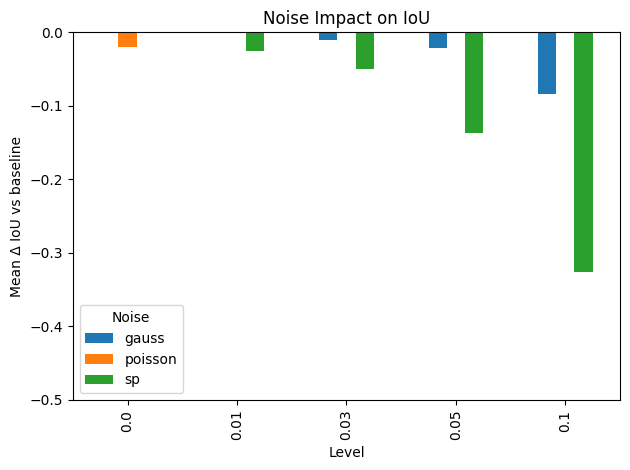

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df_exp = pd.DataFrame(rows).set_index(["Patch", "Scenario", "Noise", "Level"]).round(3)
df_exp.to_csv("experiment_results.csv")
display(df_exp)

# metrics = ["IoU", "Precision", "Recall", "F1 (Dice)"]
# df_summary = df_exp.groupby("Scenario")[[f"Δ_{m}" for m in metrics]].mean().T
# df_summary.index = df_summary.index.str.replace("Δ_", "")
# df_summary.to_csv("scenario_summary.csv")
# display(df_summary)

metrics = ["IoU", "Precision", "Recall", "F1 (Dice)"]
# df_summary = df_exp.groupby(["Scenario", "Noise"])[[f"Δ_{m}" for m in metrics]].mean()
df_summary = df_exp.groupby(["Scenario", "Noise", "Level"])[[f"Δ_{m}" for m in metrics]].mean()
df_summary = df_summary.T
df_summary.index = df_summary.index.str.replace("Δ_", "")  # убираем префикс "Δ_"
df_summary.to_csv("scenario_summary_by_noise.csv")
display(df_summary)

# Сохраняем в файл
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
csv_filename = f"noise_experiment_results_{timestamp}.csv"
df_exp.to_csv(csv_filename)
print(f"[✓] Метрики сохранены в файл: {csv_filename}")

# Plot mean Δ IoU
df_exp["Δ_IoU"].groupby(["Noise","Level"]).mean().unstack(0).plot.bar()
plt.ylabel("Mean Δ IoU vs baseline")
plt.title("Noise Impact on IoU")
plt.ylim(-0.5, 0.0)
plt.tight_layout()
plt.show()

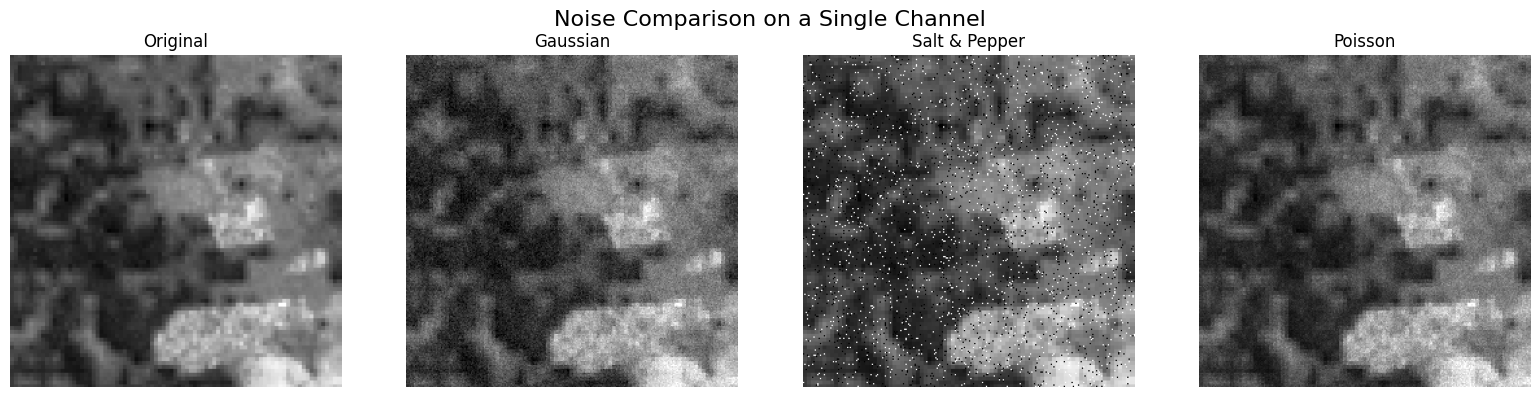

In [ ]:
import matplotlib.pyplot as plt

# Выбираем один канал (например, первый) из батча
input_tensor = inp[:, 1:2, :, :]  # (1, 1, H, W)
channels = [0]  # только первый канал

# Получаем оригинал и шумы
original = input_tensor[0, 0].cpu().numpy()
gauss    = add_gaussian_noise(input_tensor.clone(), sigma=0.05, channels=channels)[0, 0].cpu().numpy()
sp       = add_sp_noise(input_tensor.clone(), prob=0.05, channels=channels)[0, 0].cpu().numpy()
poiss    = add_poisson_noise(input_tensor.clone(), dummy_level=0, channels=channels)[0, 0].cpu().numpy()

# Подписи и изображения
titles = ["Original", "Gaussian", "Salt & Pepper", "Poisson"]
images = [original, gauss, sp, poiss]

# Визуализация
plt.figure(figsize=(16, 4))
for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.suptitle("Noise Comparison on a Single Channel", fontsize=16)
plt.tight_layout()
plt.show()


# Выводы:

Модель устойчива к слабому гауссовому шуму (σ ≤0.05).

При σ=0.10 наблюдается заметное падение, но оно гораздо меньше, чем от salt‑&‑pepper.

Salt‑&‑pepper шум уже при p=0.03 критически ухудшает результаты, а при p=0.10 модель практически перестаёт находить объекты.

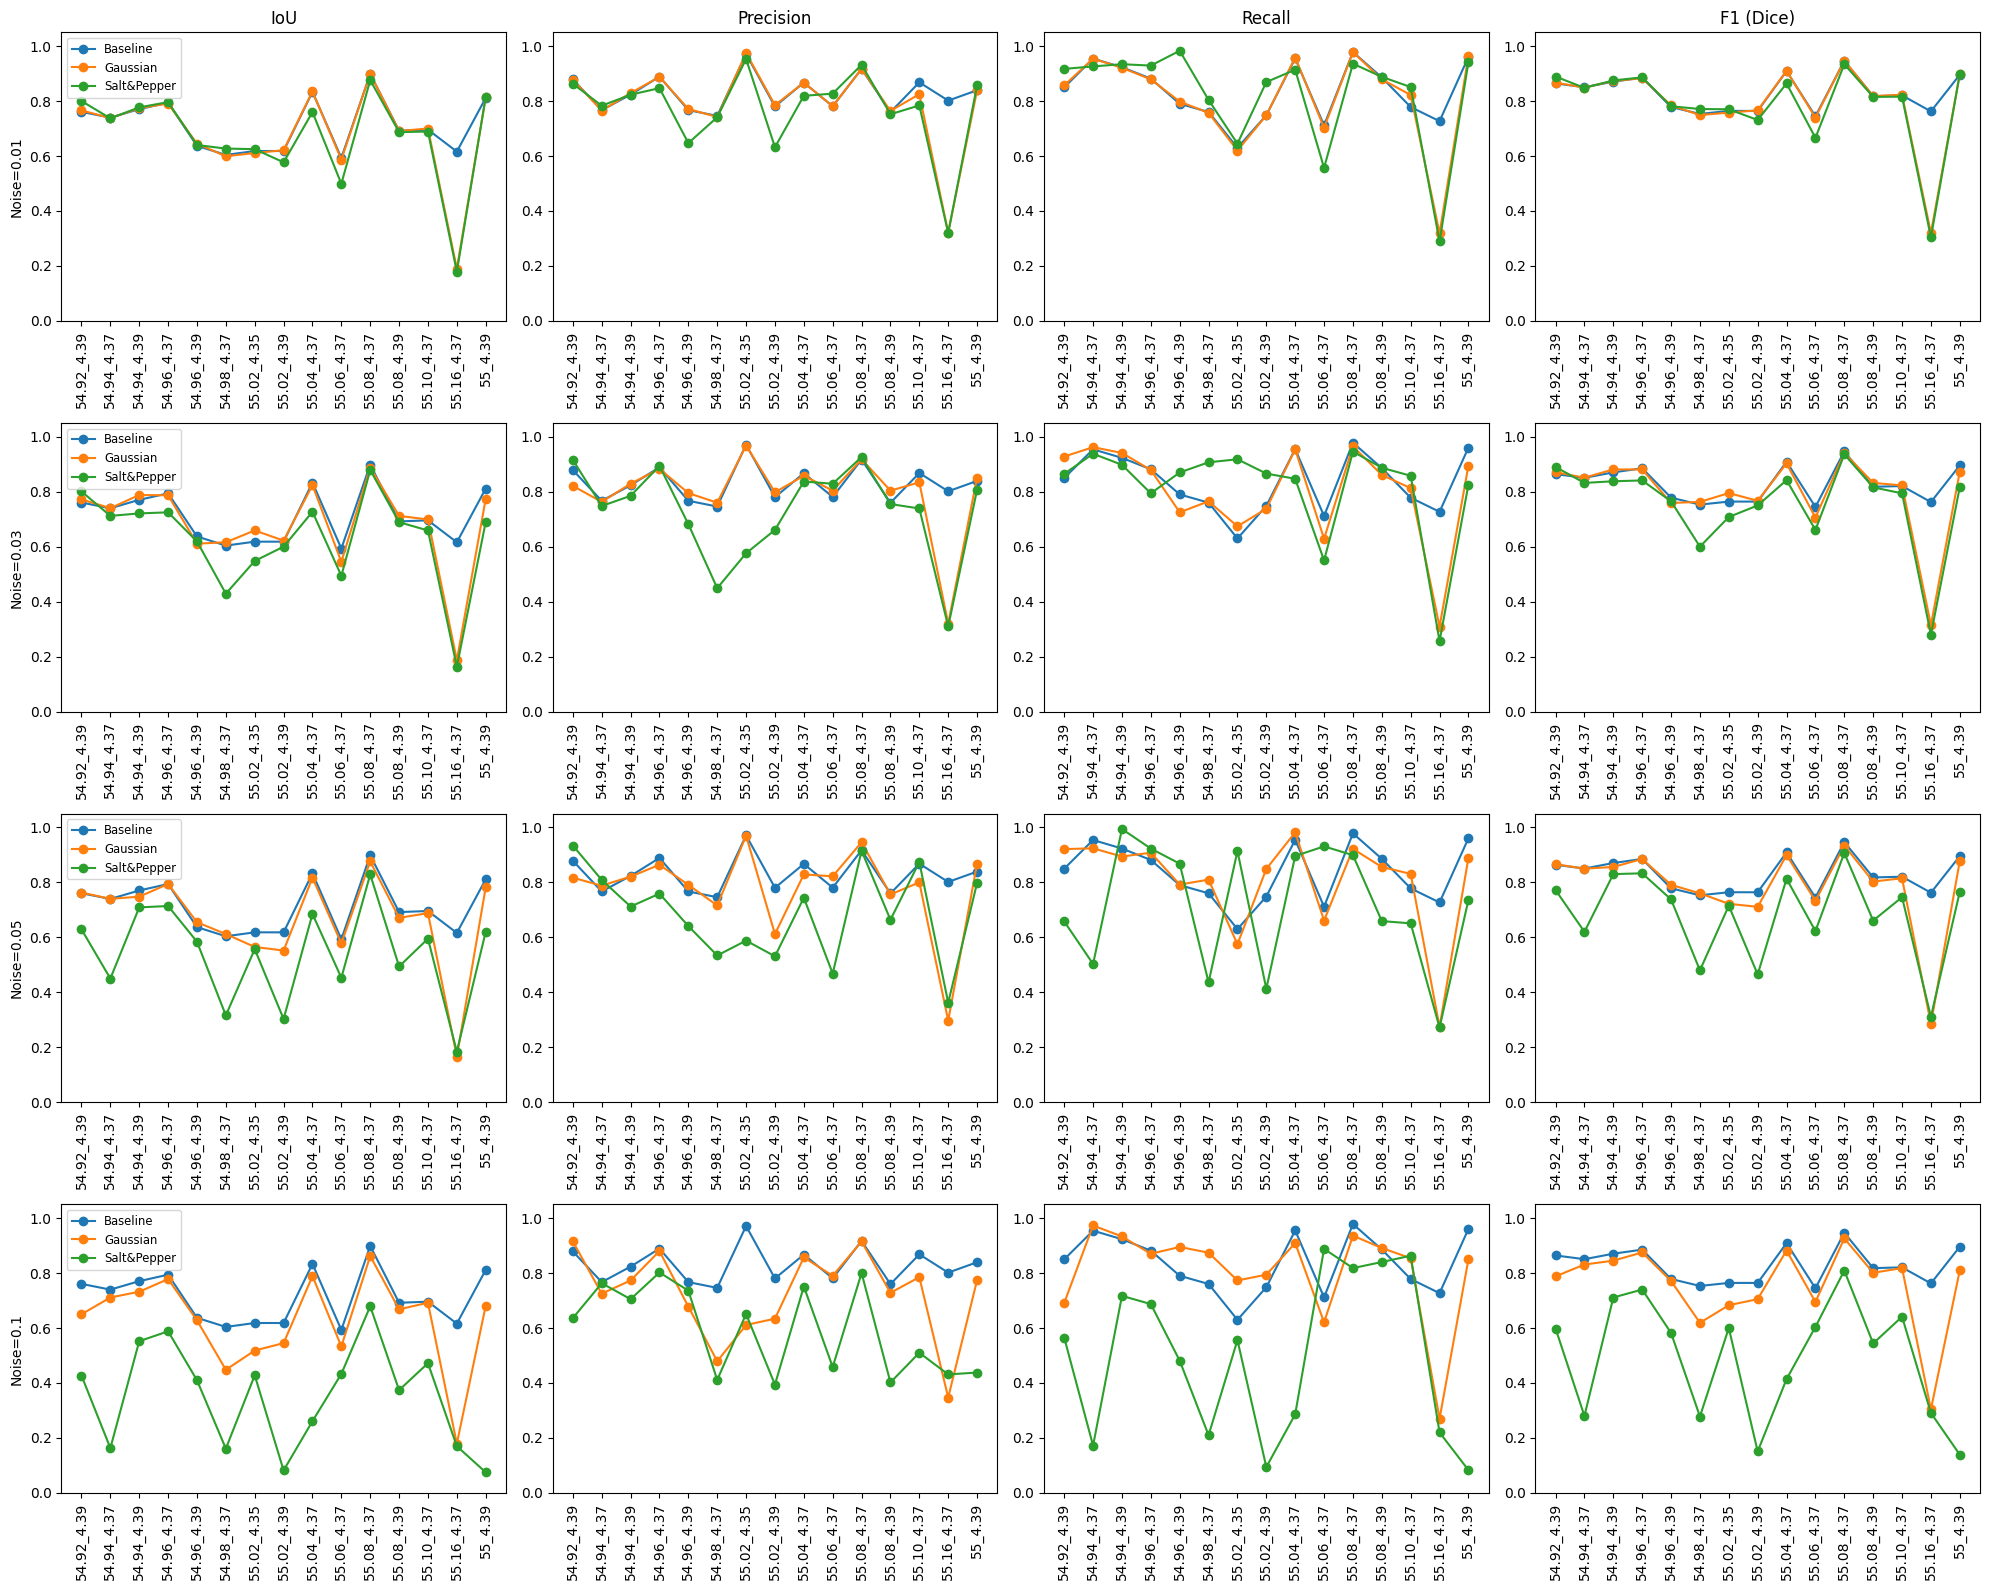

In [ ]:
noise_levels = [0.01, 0.03, 0.05, 0.10]
metrics = ["IoU", "Precision", "Recall", "F1 (Dice)"]

fig, axes = plt.subplots(len(noise_levels), len(metrics), figsize=(20, 16))

for i, lvl in enumerate(noise_levels):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        baseline = df_base[f"base_{metric}"]
        gauss   = df_exp.xs(("gauss", lvl), level=("Noise","Level"))[metric]
        sp      = df_exp.xs(("sp", lvl), level=("Noise","Level"))[metric]

        ax.plot(baseline.index, baseline, marker="o", label="Baseline")
        ax.plot(gauss.index,   gauss,     marker="o", label="Gaussian")
        ax.plot(sp.index,      sp,        marker="o", label="Salt&Pepper")
        ax.set_ylim(0, 1.05)
        ax.tick_params(axis="x", rotation=90)
        if i == 0:
            ax.set_title(metric)
        if j == 0:
            ax.set_ylabel(f"Noise={lvl}")
        if j == 0:
            ax.legend(fontsize="small")

plt.tight_layout()
plt.show()


**Почему патч 55.16_4.37 — выброс**

    Baseline IoU ≈0.616 (ниже среднего ≈0.697).

    Этот участок имеет очень мало «положительных» пикселей (очень небольшую площадь вырубки).

    Salt‑&‑pepper шум при p≥0.05 «затирает» эти редкие пиксели — IoU стремится к нулю.

    Даже Gaussian noise даёт сильную флуктуацию, потому что при малом числе целевых пикселей любая погрешность решительно меняет TP/FP.

    Вывод: чем меньше объект на картинке, тем более хрупкой оказывается метрика IoU (и Precision/F1) к шуму — особенно к «соле‑и‑перцу».

Следующие сэмлы так же имеют низкие скачки (можно сравнить по графику и по их значению IOU)

54.96_4.39  0.637099

54.98_4.37  0.603898  

55.02_4.35  0.618223

55.02_4.39  0.618191

55.06_4.37  0.593037

55.16_4.37  0.615971

И у них так же более низкие скачки шума

# Анализ

1. Визуализация сэмпла 54.98_4.37: показать ground‑truth + предсказания с noise=0.05 и 0.10, чтобы убедиться в малом размере целевого региона (обезлесения)

/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


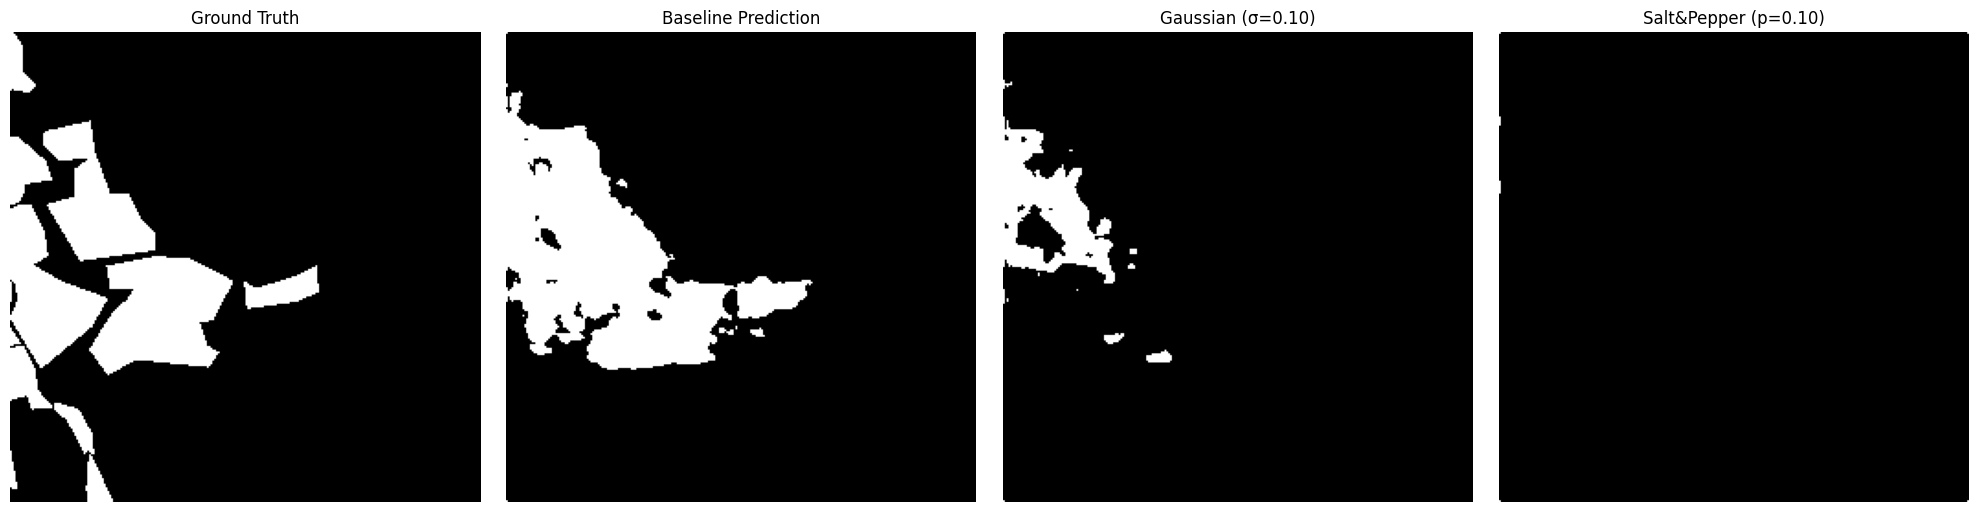

In [ ]:
import matplotlib.pyplot as plt

patch = "54.98_4.37"
inp, gt = load_patch_tensor(patch, device)
best_thr, _ = evaluate_best(inp, gt)

def predict_mask(tensor):
    batch = {"input": tensor, "mask": torch.zeros_like(tensor[:, :1])}
    with torch.no_grad():
        pred = torch.sigmoid(model(batch)["logits"])[0].cpu().numpy()
    return (pred > best_thr).astype(float)

baseline_mask = predict_mask(inp)
gauss_mask   = predict_mask(add_gaussian_noise(inp.clone(), 0.10))
sp_mask      = predict_mask(add_sp_noise(inp.clone(), 0.10))

fig, axes = plt.subplots(1, 4, figsize=(20,5))
titles = ["Ground Truth", "Baseline Prediction", "Gaussian (σ=0.10)", "Salt&Pepper (p=0.10)"]
images = [gt[0], baseline_mask.squeeze(), gauss_mask.squeeze(), sp_mask.squeeze()]

for ax, title, img in zip(axes, titles, images):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


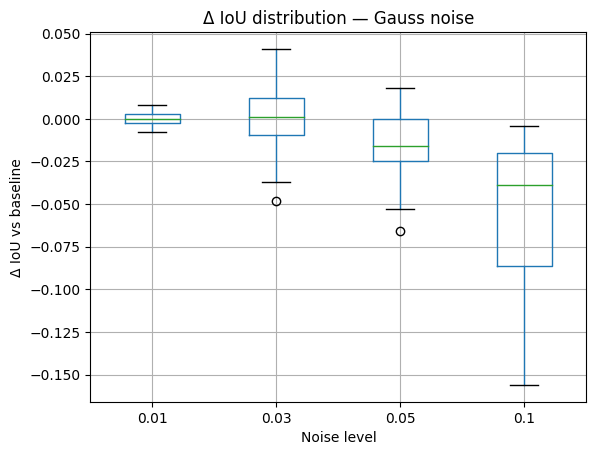

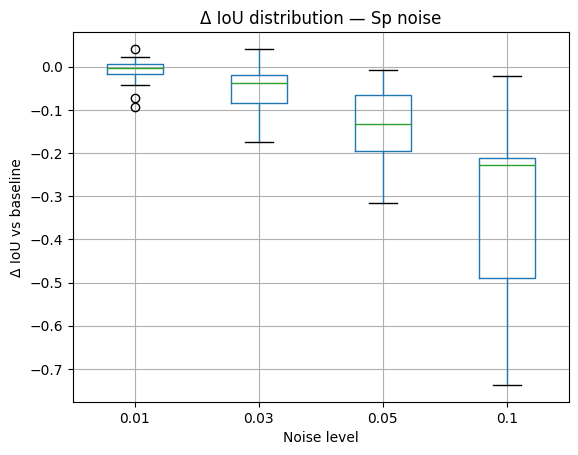

In [ ]:
for noise in ["gauss", "sp"]:
    plt.figure()
    subset = df_exp.xs(noise, level="Noise")["Δ_IoU"].unstack("Level")
    subset.boxplot()
    plt.title(f"Δ IoU distribution — {noise.capitalize()} noise")
    plt.xlabel("Noise level")
    plt.ylabel("Δ IoU vs baseline")
    plt.show()


Распределение изменения IoU (Δ IoU) по всем 16 патчам.

Что показывает каждый boxplot

    Средняя линия (зелёная) — медиана Δ IoU (50‑й перцентиль).

    «Ящик» (IQR) — диапазон от 25‑го до 75‑го перцентиля (где находится половина патчей).

    «Усы» — разброс данных до ~1.5×IQR.

    Точки‑выбросы — патчи, где падение IoU намного сильнее остальных.

🔹 Gaussian noise
Level	Медиана Δ IoU	IQR	Выбросы
0.01	~0.0	~±0.005	нет
0.03	~−0.005	−0.015…+0.010	один патч ~−0.05
0.05	~−0.02	−0.03…0.00	один ~−0.07
0.10	~−0.04	−0.08…−0.03	сильный «хвост» до −0.15

→ Вывод: гауссов шум почти не влияет до σ≈0.05. При σ=0.10 среднее падение IoU ≈4 %, максимальное — ≈15 %.

🔸 Salt‑&‑Pepper noise
Level	Медиана Δ IoU	IQR	Выбросы
0.01	~−0.01	−0.02…0.00	несколько ~−0.10
0.03	~−0.06	−0.12…−0.02	нет
0.05	~−0.15	−0.22…−0.09	один ~−0.32
0.10	~−0.23	−0.50…−0.16	экстремальные до −0.75

→ Вывод: даже слабый sp‑шум (p=0.03) снижает IoU ≈6 %. При p=0.10 среднее падение ≈23 %, а некоторые патчи «теряют» до 75 % IoU.

📌 Итог

    Gaussian noise — модель устойчива (малое падение + низкая вариативность) до уровня σ≈0.05.

    Salt‑&‑Pepper noise — значительно хуже: растёт как среднее падение, так и разброс, особенно на сильных уровнях (p≥0.05).

    Выбросы (outliers) указывают на патчи, где шум практически стирает целевой регион (особенно мелкие объекты).